In [42]:
import pandas as pd
import numpy as np

#### Quel est le client type de l'entreprise ? 
#### Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnaliser la campagne marketing ?
#### Comment peut-on expliquer la fréquence d'achat d'un client, en fonction des variables mises à disposition (revenu, année de naissance, nombre d'enfant(s) etc.) ?

In [5]:
path = 'C:/Users/jules/Desktop/Cours/DataScience/projet-transverse/marketing_campaign.csv'
df = pd.read_csv(path, sep = '\t')

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<AxesSubplot:>

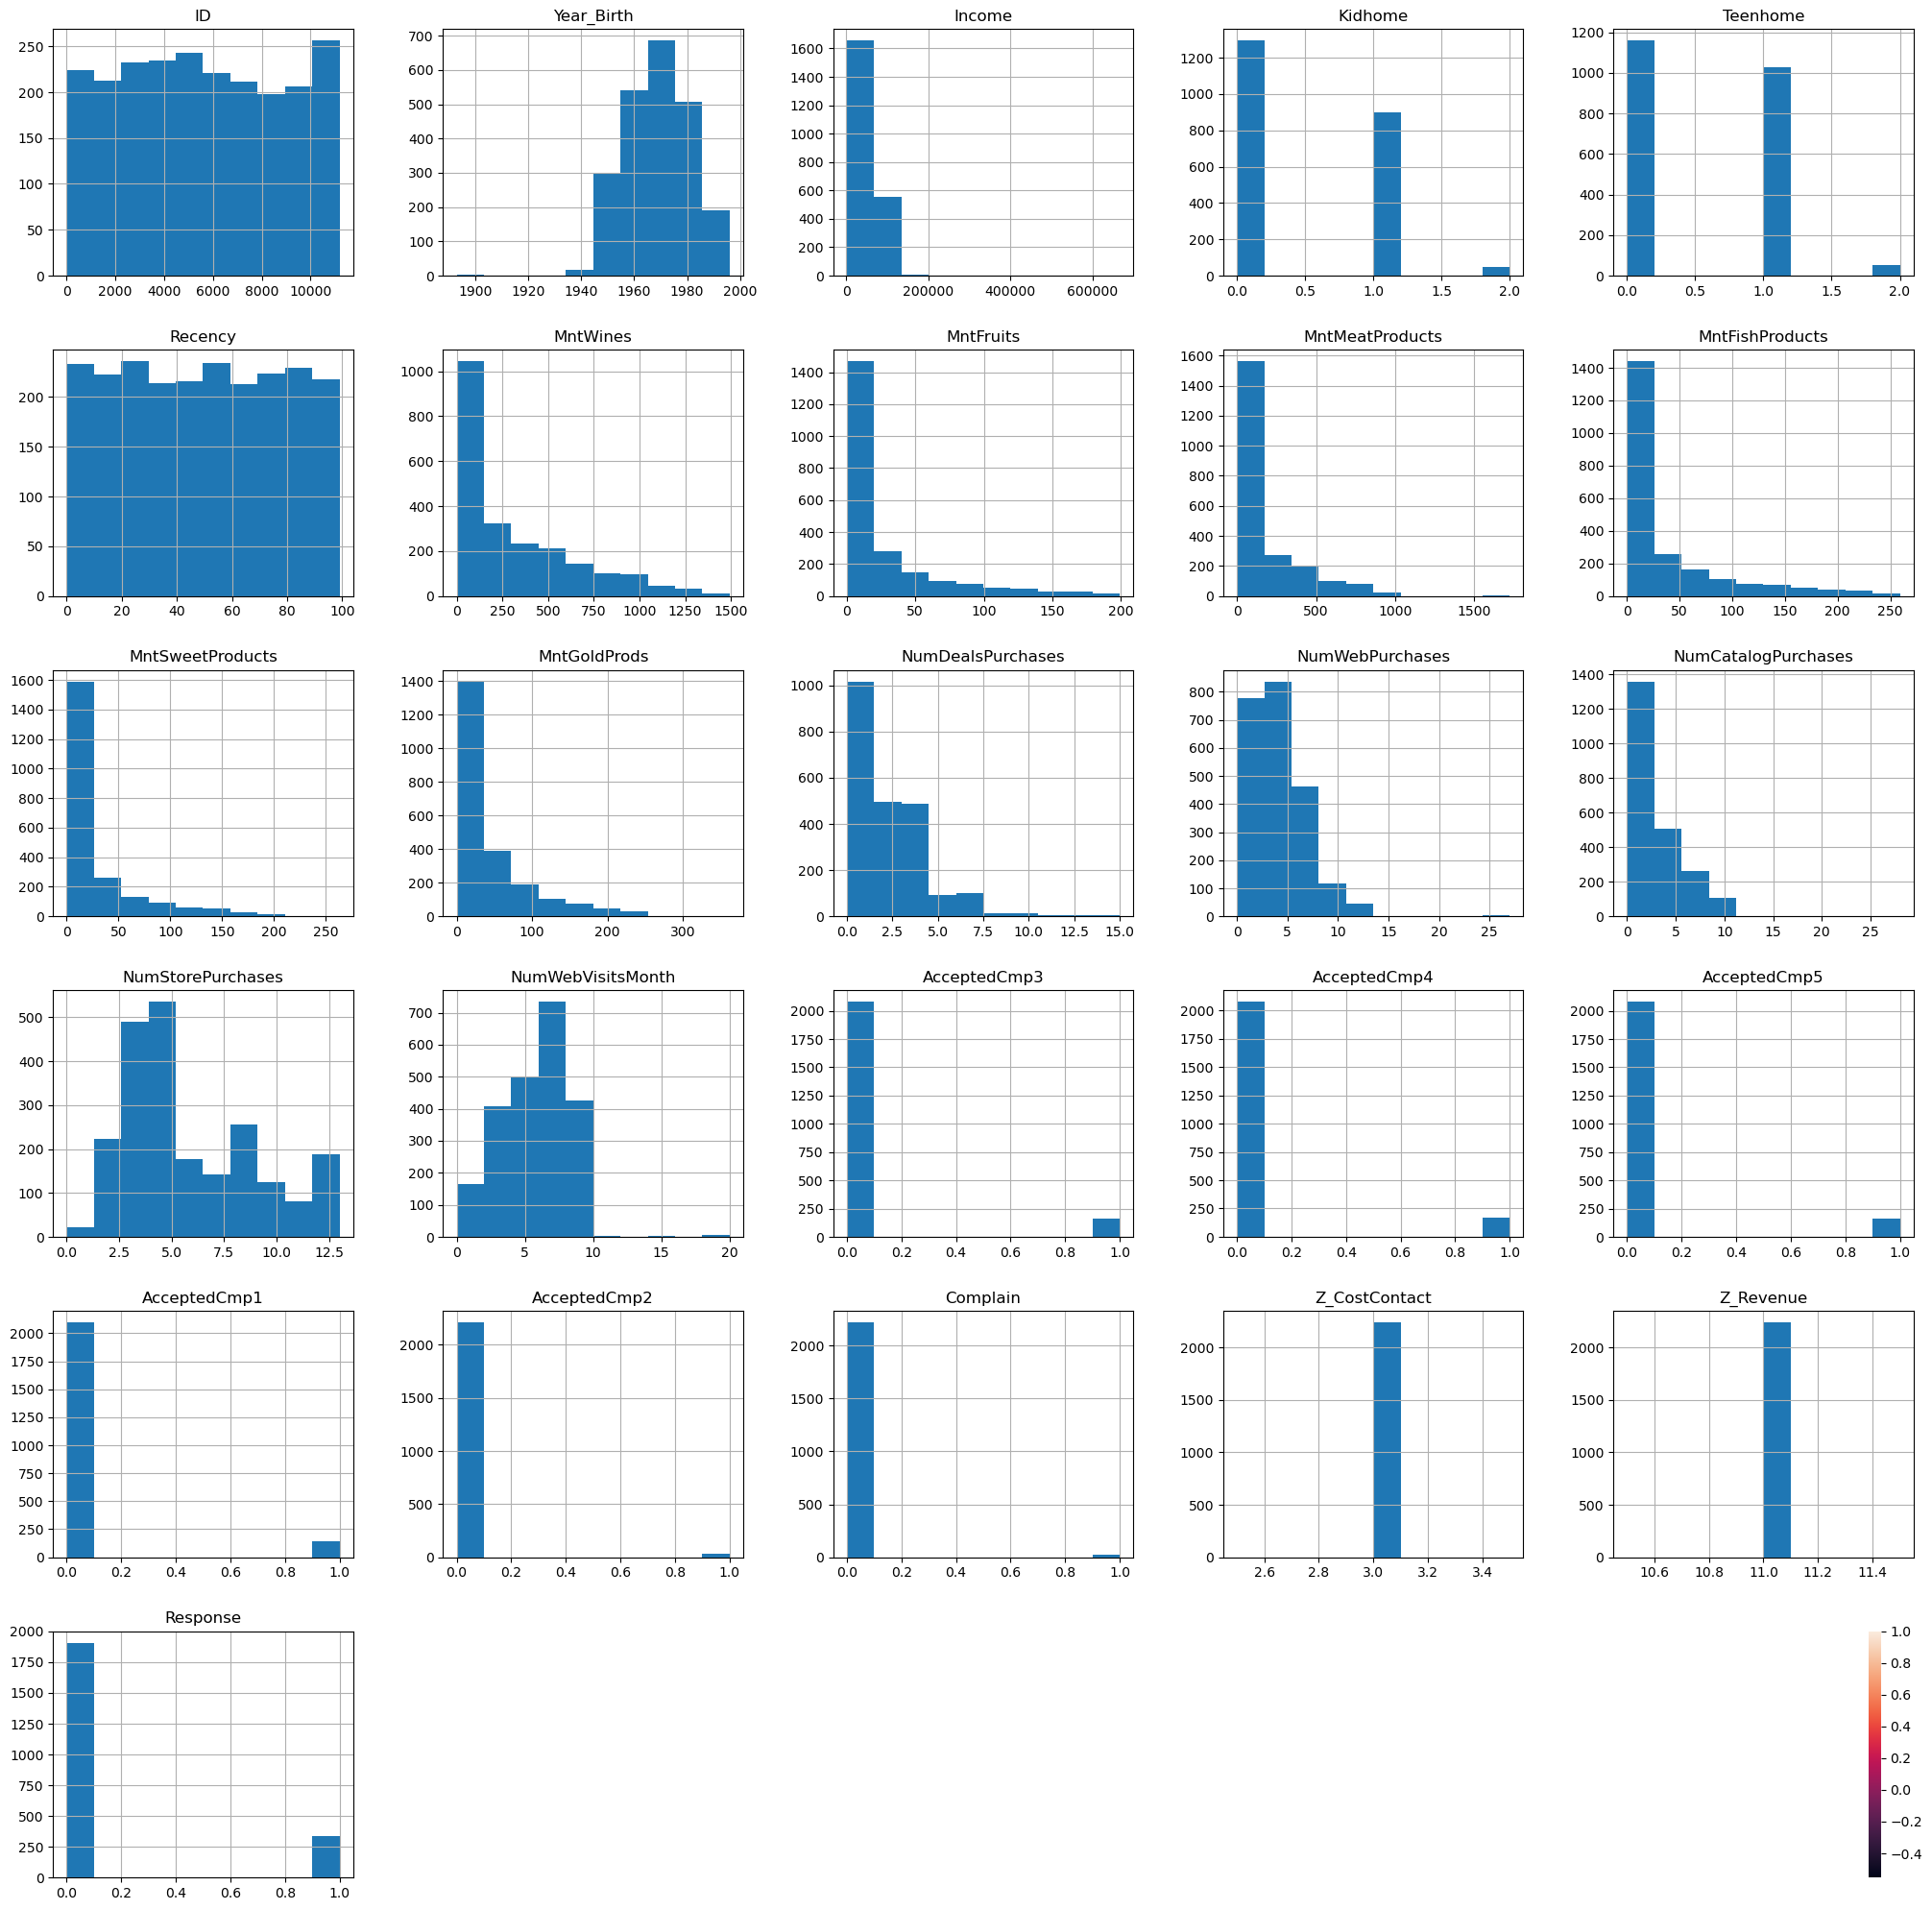

In [7]:
import seaborn as sns
df.hist(figsize=(25, 25))

<AxesSubplot:>

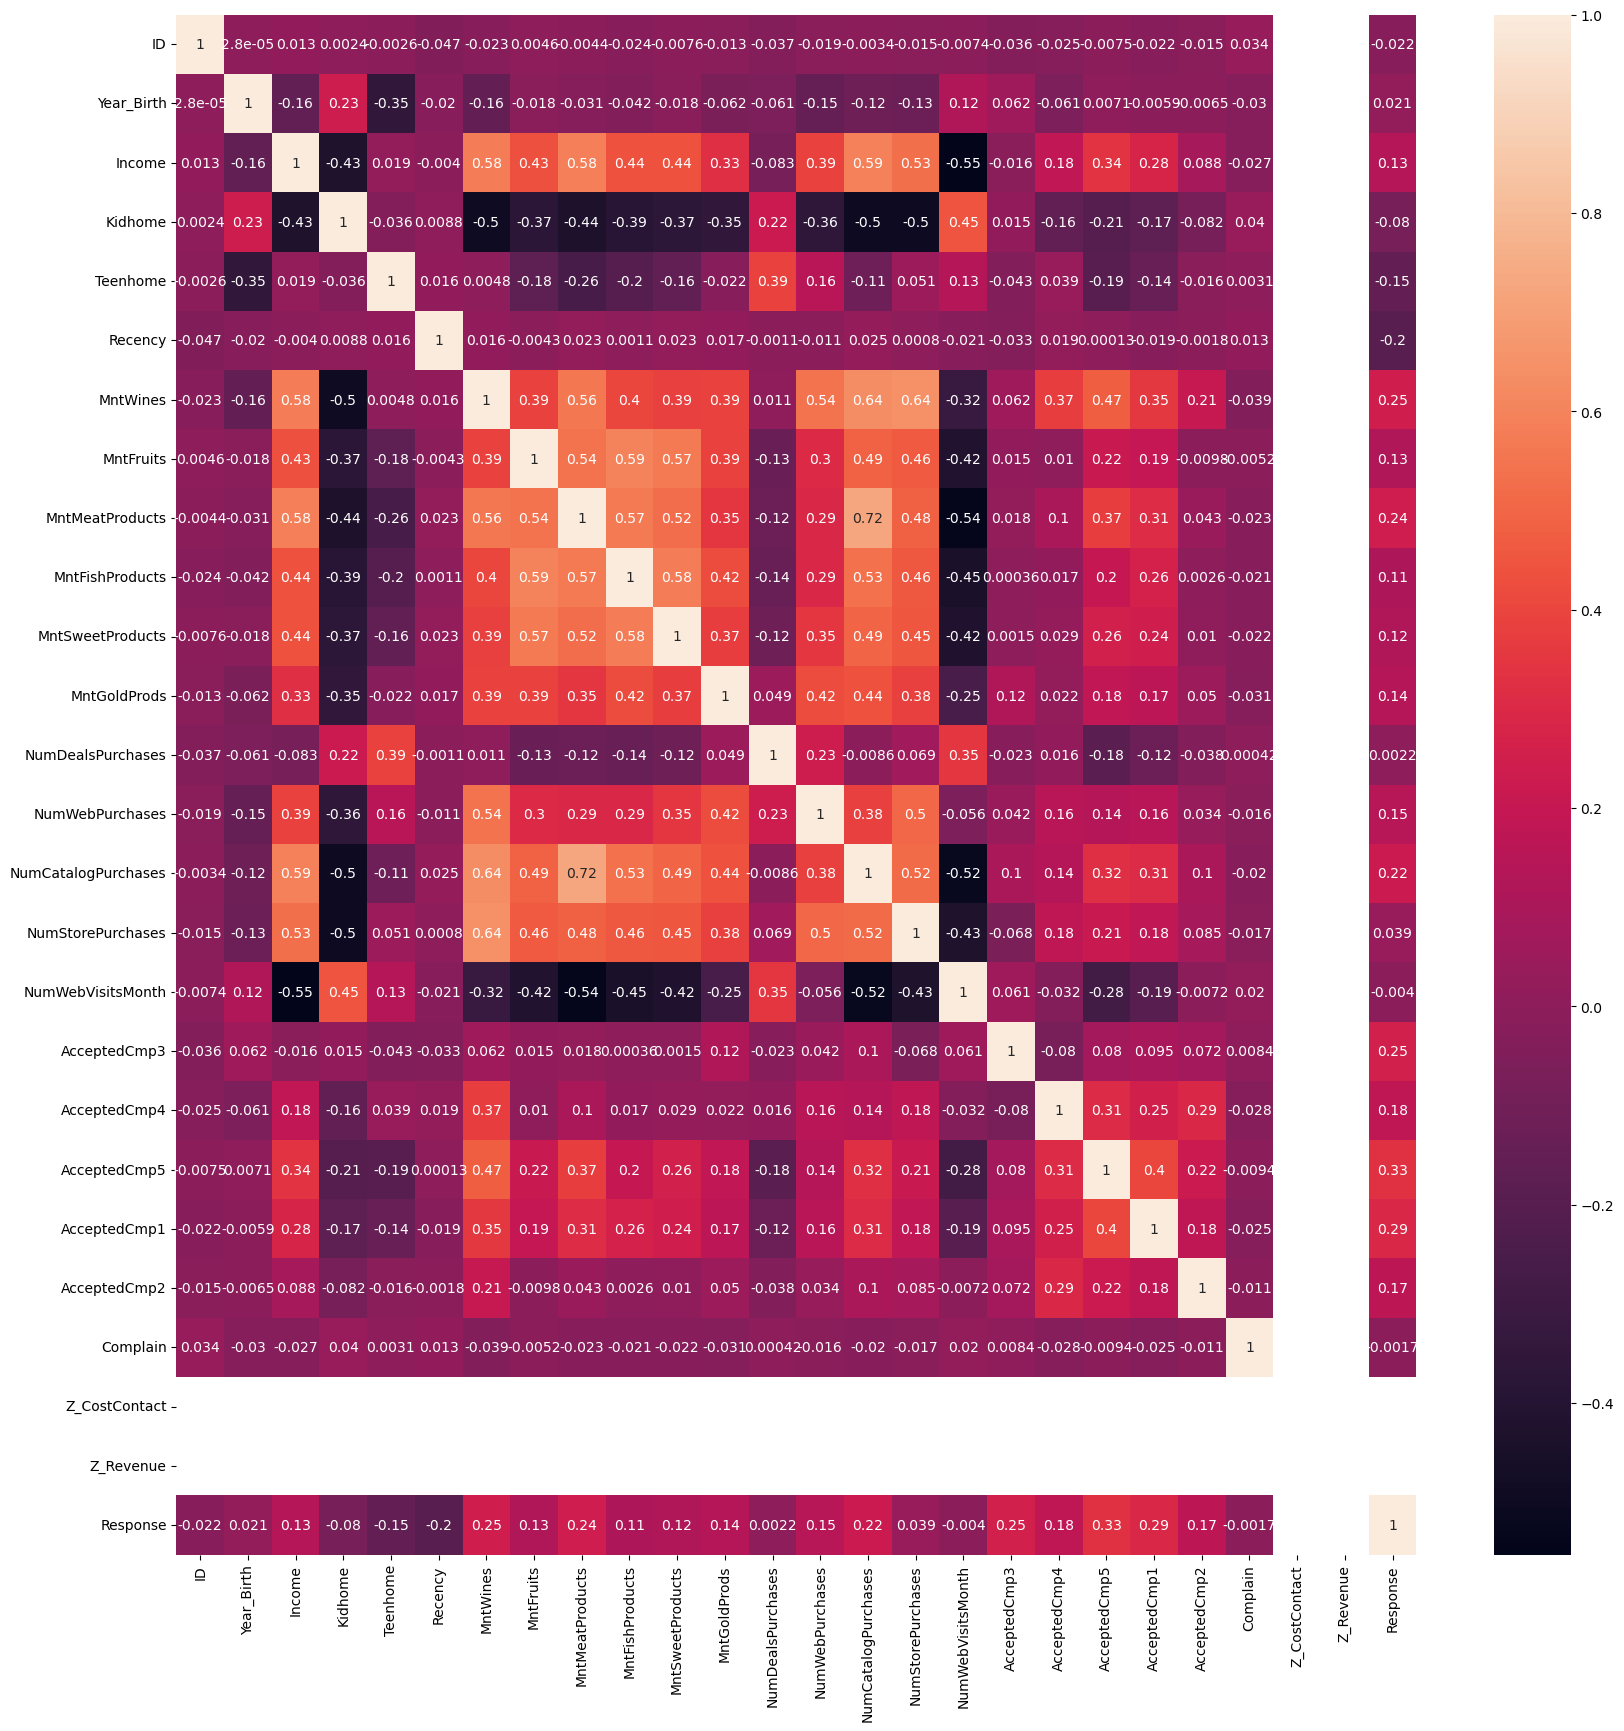

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

Year_Birth    1968.805804
dtype: float64 Year_Birth    11.984069
dtype: float64


array([[<AxesSubplot:title={'center':'Year_Birth'}>]], dtype=object)

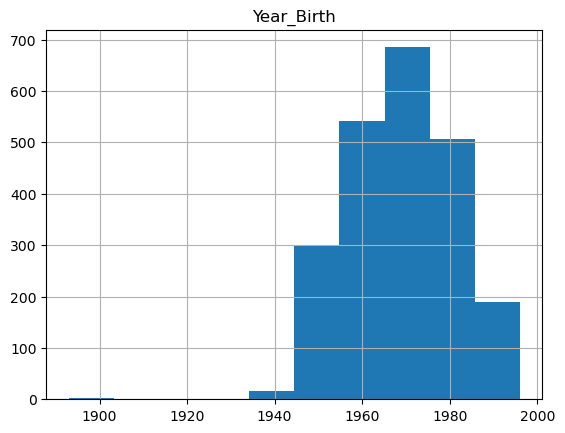

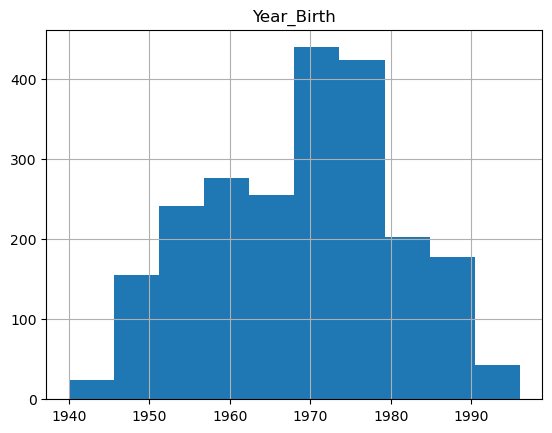

In [83]:
from statistics import mean

year_birth = df[['Year_Birth']]
print(year_birth.mean(), year_birth.std())
year_birth.hist()
year_birth_filtered = year_birth[year_birth >= 1930]
year_birth_filtered.hist()

(array([0.00191583, 0.01237308, 0.01923814, 0.02203206, 0.02035571,
        0.03504374, 0.03376652, 0.01620474, 0.01420908, 0.00343253]),
 array([1940. , 1945.6, 1951.2, 1956.8, 1962.4, 1968. , 1973.6, 1979.2,
        1984.8, 1990.4, 1996. ]),
 <BarContainer object of 10 artists>)

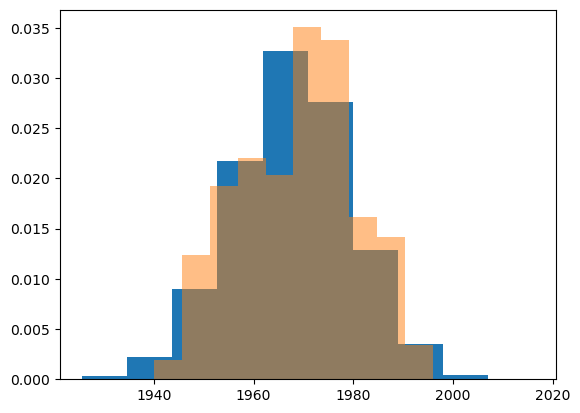

In [82]:
s = np.random.normal(1968, 12, 10000)
plt.hist(s, density=True)
plt.hist(year_birth_filtered, density=True, alpha = 0.5)

le max de income filtre est Income    162397.0
dtype: float64 non filtre est Income    666666.0
dtype: float64


array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

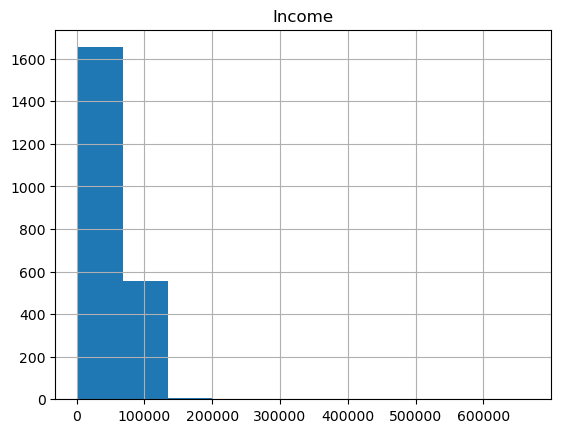

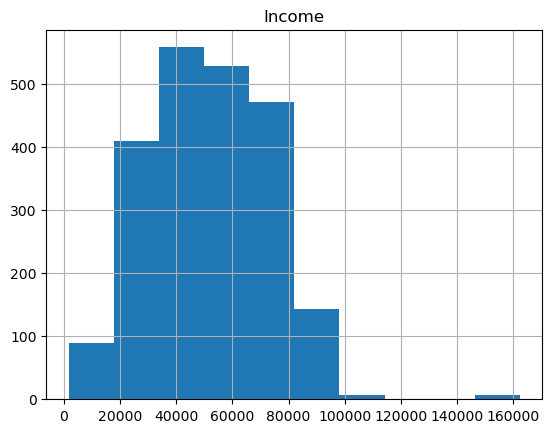

In [118]:
income = df[['Income']]
income.hist()
income_filtered = income[income <= 665000]
print('le max de income filtre est', income_filtered.max(), 'non filtre est', income.max())
income_filtered.hist()

,Income
124,101970.0
164,157243.0
203,102160.0
252,102692.0
617,162397.0
646,105471.0
655,153924.0
687,160803.0
1300,157733.0
1653,157146.0


<AxesSubplot:>

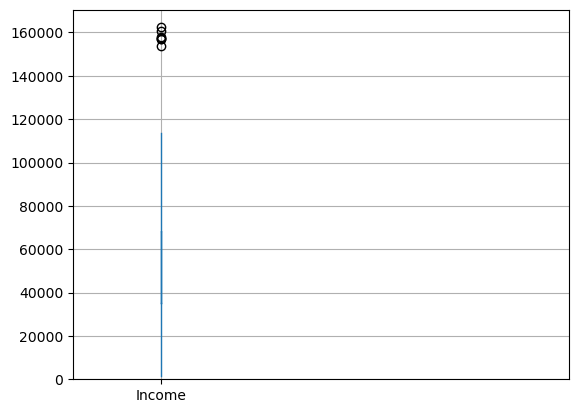

In [121]:
mu = income_filtered.mean()
sigma = income_filtered.std()
s = np.random.normal(mu, sigma, 10000)
plt.hist(s, density=True)
plt.hist(income_filtered, density=True, alpha = 0.5)
income_filtered.boxplot()

In [40]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

#créer y et X
list_var=df.columns[1, 6]
y=df.Income
X=df[list_var]

modeleReg.fit(X,y)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [38]:
list_var=df.columns[1]
list_var


'Year_Birth'

In [ ]:
print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(X,y)

RMSE=np.sqrt(((y-modeleReg.predict(X))**2).sum()/len(y))

plt.plot(y, modeleReg.predict(X),'.')
plt.show()

plt.plot(y, y-modeleReg.predict(X),'.')
plt.show()

In [43]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(X)
print(y)
reg = LinearRegression().fit(X, y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[ 6  8  9 11]
